# **🏨 Prediction of Hotel Booking Demand Cancellation**
This notebook presents a complete machine learning and deep learning pipeline to predict whether a hotel booking will be canceled or not. The project is based on a real-world dataset from Kaggle and aims to support hotel management in minimizing revenue loss and improving operational planning.

# **Contents:**
1. **Data Exploration:**
  * Overview of dataset features
  * Handling missing values and outliers
2. **Data Preprocessing:**
  * Encoding categorical variables
  * Dropping less relevant or skewed features

3. **Modeling & Evaluation**
  * Multiple classifiers used: Decision Tree, Random Forest, SVM, KNN, XGBoost, Lightgbm, ANN
  * Hyperparameter tuning via GridSearchCV
  * Performance metrics: Accuracy, Precision, Recall, F1-Score, ROC AUC
  * Confusion matrices and ROC curves for visual insights


4. **Results Comparison**
  * Comparative performance across all models
  * Strengths and weaknesses of each approach

# 🔍 Goal:
To identify booking cancellations ahead of time using structured data, allowing hotels to take proactive actions (e.g., overbooking mitigation, targeted offers, etc.).

**Why Interesting:** Helps hotels optimize overbooking and revenue.



# 📊 Dataset:
[Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) - Hotel Booking Demand Dataset

Includes over 119,000 bookings with variables like hotel type, booking channel, customer type, and more.

# 🔹 Data Loading and Initial Exploration
In this section, Import the necessary libraries and load the hotel booking dataset. Then perform a quick exploratory analysis to understand the structure, size, and sample records of the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Tuning model with GridSearchCV
from sklearn.model_selection import GridSearchCV

import joblib #used to save the model

#for ANN
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import RobustScaler

Loading Data

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Show Unique Values

In [ ]:
def show_unique_values(df):
    """
    Displays the number of unique values and the unique values for each column in a DataFrame.
    """
    for col in df.columns:
        print(f"Column: {col}")
        print(f"  Unique Count: {df[col].nunique()}")

        # If number of unique values is small, print them
        if df[col].nunique() <= 20:
            print(f"  Unique Values: {df[col].unique()}")
        else:
            print("  Unique Values: Too many to display")

        print('-' * 60)

show_unique_values(df)

Column: hotel
  Unique Count: 2
  Unique Values: ['Resort Hotel' 'City Hotel']
------------------------------------------------------------
Column: is_canceled
  Unique Count: 2
  Unique Values: [0 1]
------------------------------------------------------------
Column: lead_time
  Unique Count: 479
  Unique Values: Too many to display
------------------------------------------------------------
Column: arrival_date_year
  Unique Count: 3
  Unique Values: [2015 2016 2017]
------------------------------------------------------------
Column: arrival_date_month
  Unique Count: 12
  Unique Values: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
Column: arrival_date_week_number
  Unique Count: 53
  Unique Values: Too many to display
------------------------------------------------------------
Column: arrival_date_day_of_month
  Unique Count: 31
  Unique Values: Too ma

# 🔹 Data Cleaning and Preprocessing

Drop unused Columns, Rows

In [ ]:
#Drop duplicates row
df.drop_duplicates(inplace=True)

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
#Drop Columns
df.drop(['company',
         'agent',
         'arrival_date_year',
         'arrival_date_month',
         'arrival_date_week_number',
         'arrival_date_day_of_month',
         'reserved_room_type',
         'assigned_room_type',
         'reservation_status_date',
         'reservation_status',
         'booking_changes'
         ],axis=1,inplace=True)

In [ ]:
#check NULL values
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4
babies,0
meal,0
country,452


In [ ]:
#Drop NULL Values
df.dropna(inplace=True)

In [ ]:
df.shape

(86940, 21)

In [ ]:
df['is_canceled'].value_counts()

,count
is_canceled,
0,62953
1,23987


Categorical Encoding

In [ ]:
#select object columns
df.select_dtypes(include=['object']).columns

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'deposit_type', 'customer_type'],
      dtype='object')

In [ ]:
df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,69028
Direct,12827
Corporate,4903
GDS,181
Undefined,1


In [ ]:
#drop row when market_segment == undefined
df.drop(df[df['distribution_channel'] == 'Undefined'].index, inplace=True)

**meal:**
Type of meal booked. Categories are presented in standard hospitality meal packages:
* **Undefined/SC:** no meal package.
* **BB:** Bed & Breakfast.
* **HB:** Half board (breakfast and one other meal – usually dinner);
* **FB:** Full board (breakfast, lunch and dinner)

As we know **Undefined** & **SC** are the same "no meal package", so I will apply manually mapping.

In [ ]:
# convert column meal to int based on meta data
df['meal'] = df['meal'].map({'Undefined': 0, 'SC': 0, 'BB': 1, 'HB': 2, 'FB': 3})

In [ ]:
# Instantiate the encoder
le = LabelEncoder()

# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Now check the data types
print(df.dtypes)


hotel                               int64
is_canceled                         int64
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
deposit_type                        int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object


In [ ]:
#convert children to int
df['children'] = df['children'].astype(int)

In [ ]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0
meal,0
country,0


#🔹 Data Visualization

Correlation Matrix

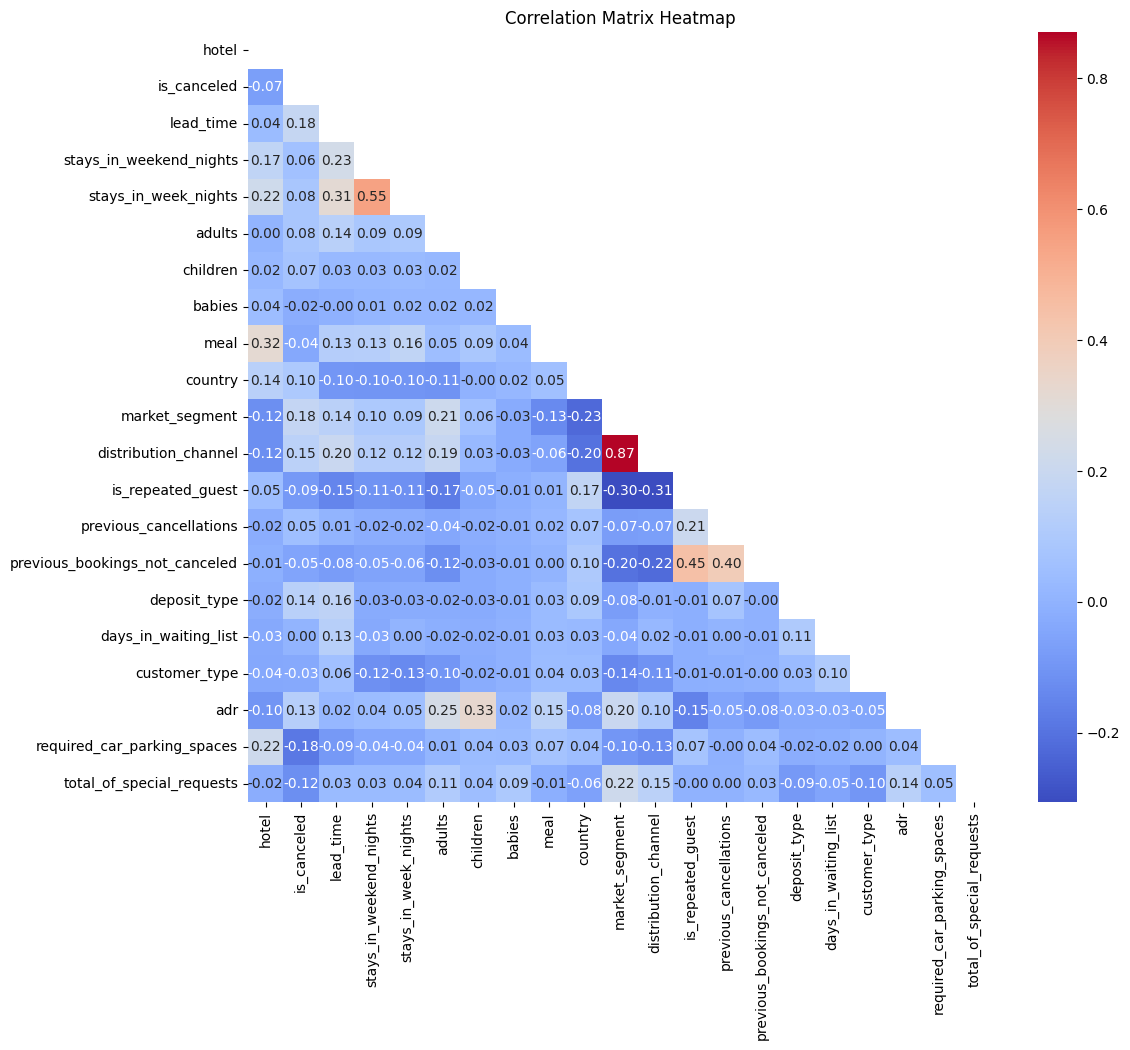

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix))


# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,mask= mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig('Correlation Matrix Heatmap.png') # save plot
plt.show()

In [ ]:
df.drop(['market_segment'],axis=1,inplace=True)

Visualize Value Counts per Column - bar charts

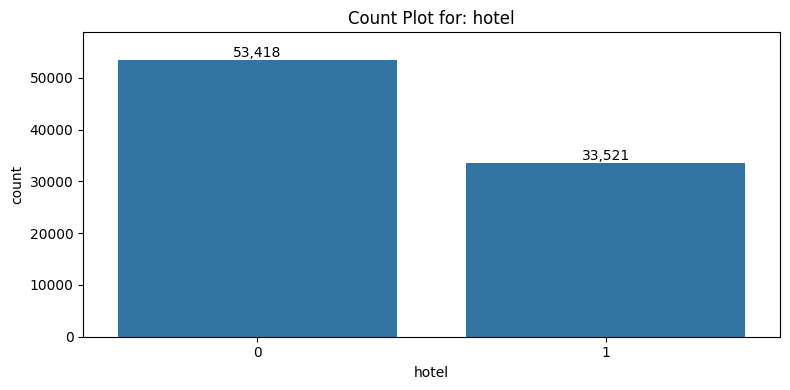

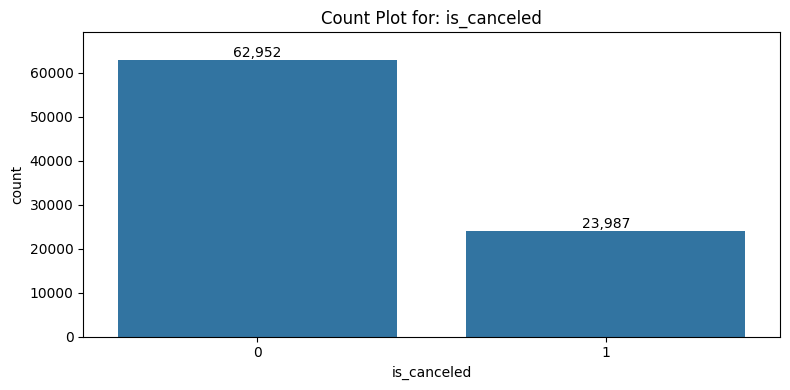

Skipped 'lead_time' (too many unique values: 479)


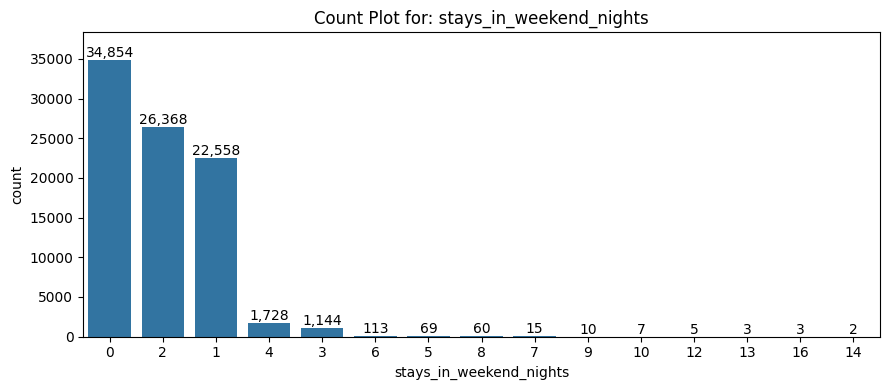

Skipped 'stays_in_week_nights' (too many unique values: 33)


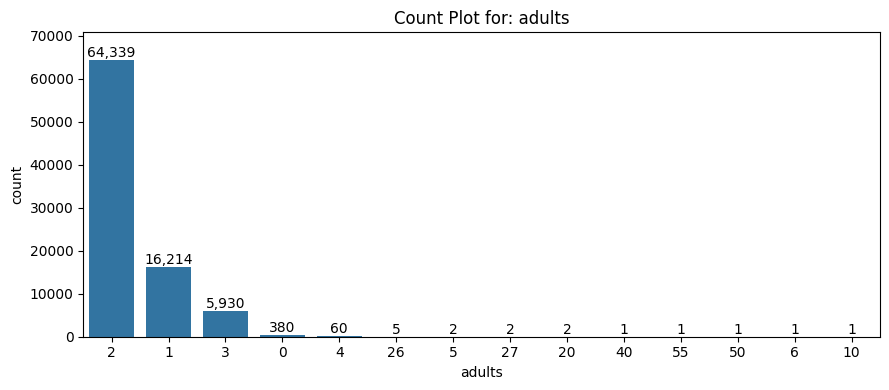

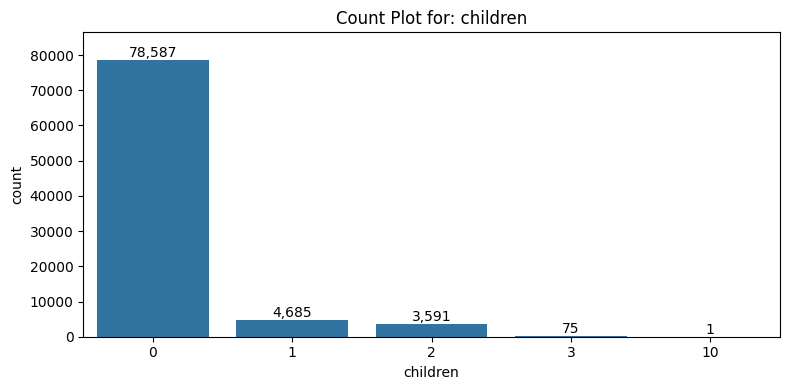

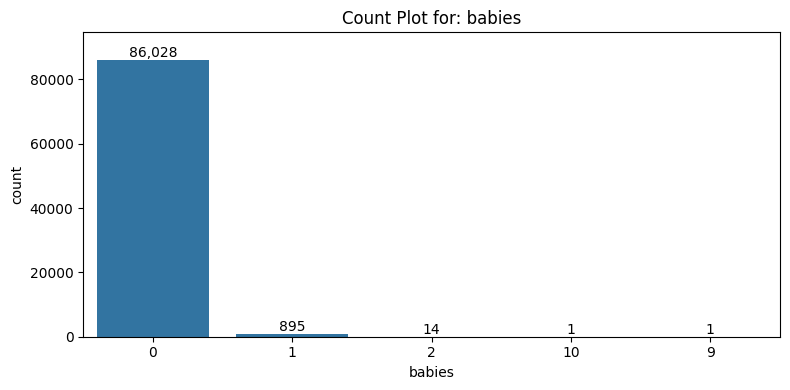

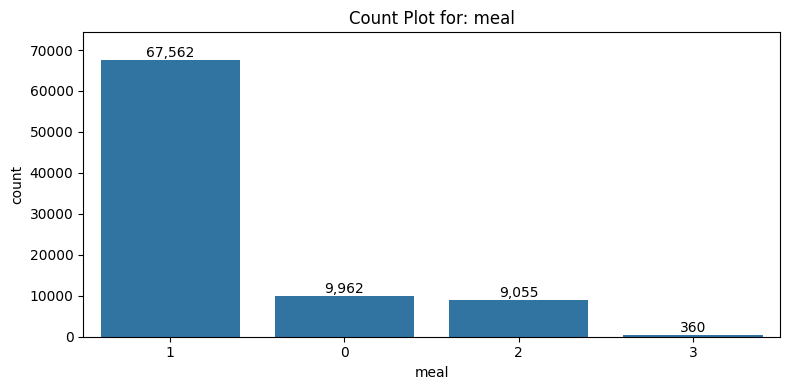

Skipped 'country' (too many unique values: 177)


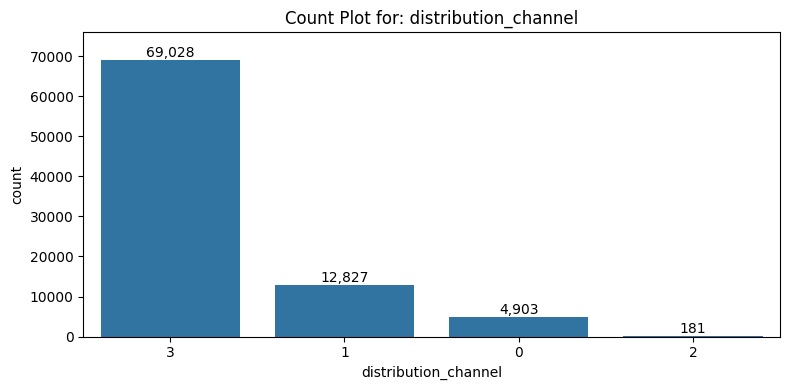

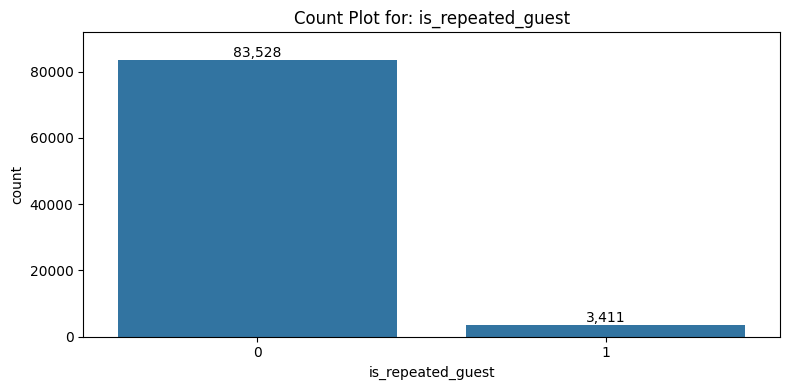

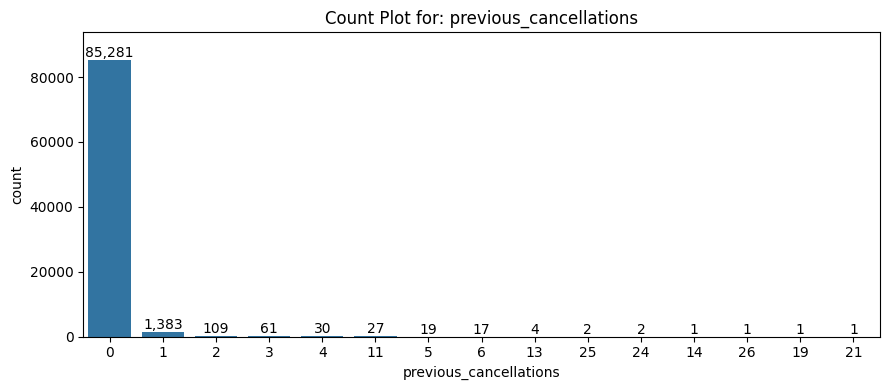

Skipped 'previous_bookings_not_canceled' (too many unique values: 73)


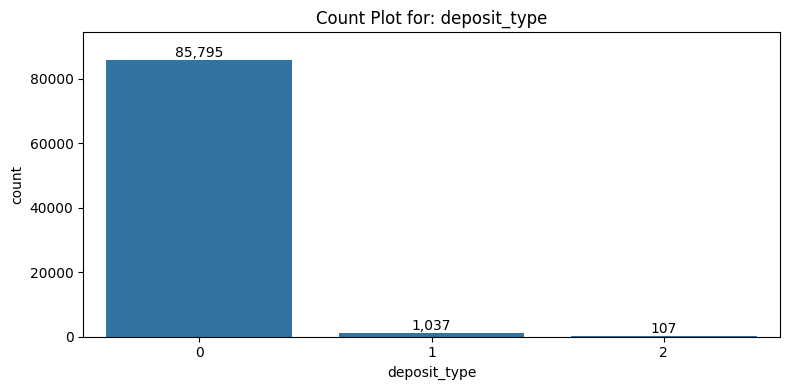

Skipped 'days_in_waiting_list' (too many unique values: 128)


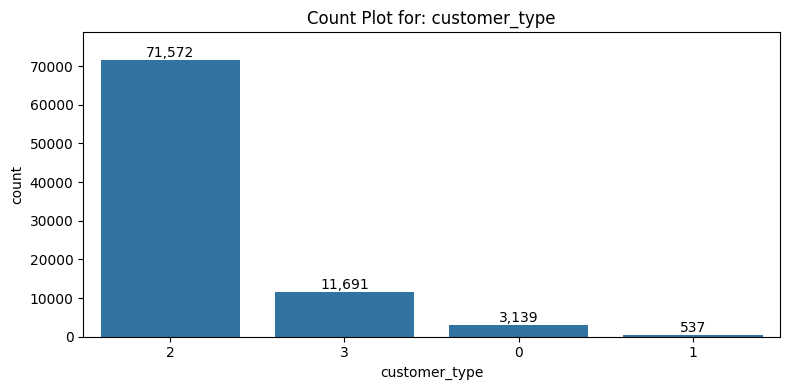

Skipped 'adr' (too many unique values: 8870)


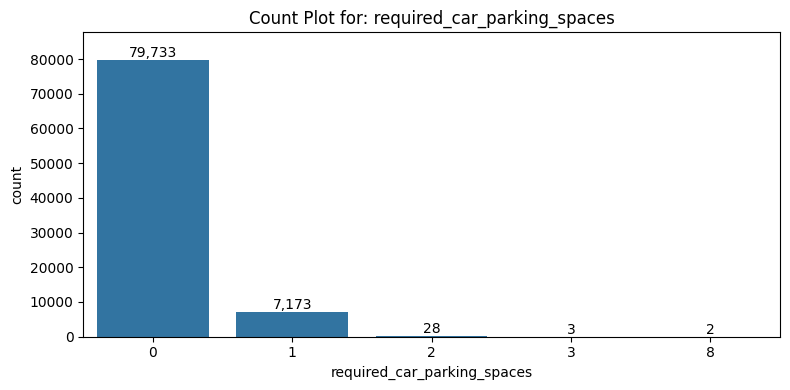

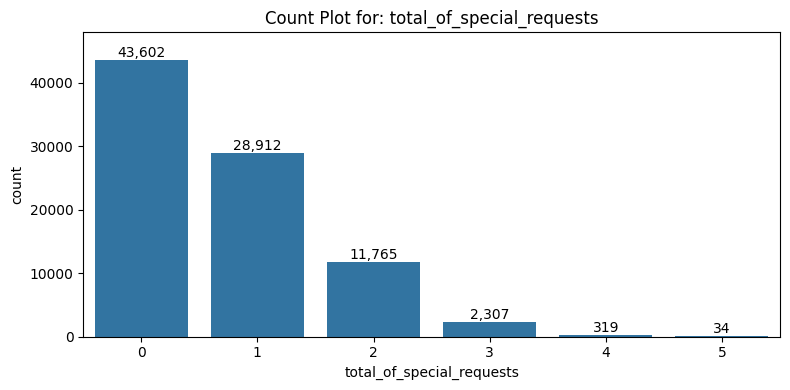

In [ ]:
def plot_value_counts(df, max_unique=20):
    """
    Plots bar charts of value counts for each column in the DataFrame.
    Only includes columns with unique values less than or equal to `max_unique`.

    Args:
        df: The input DataFrame.
        max_unique: Maximum number of unique values to include for plotting.
    """
    for col in df.columns:
        unique_vals = df[col].nunique()

        if unique_vals <= max_unique:
            figsize = (8, 4)
            if unique_vals > 10:  # Change figure size if unique values > 10
                figsize = (9, 4)

            plt.figure(figsize=figsize)
            ax = sns.countplot(x=df[col],
                   order=df[col].value_counts().index);
            abs_values = df[col].value_counts().values

            #show value in bar with comma as thousands separator
            ax.bar_label(container=ax.containers[0], labels=[f'{x:,}' for x in abs_values])
            #change ylim for top space
            max_count = df[col].value_counts(ascending=False).max()
            plt.ylim(top= max_count + (max_count * 0.1) )

            plt.title(f'Count Plot for: {col}')
            plt.tight_layout()
            plt.savefig(f'{col} count plot.png') # save plot
            plt.show()
        else:
            print(f"Skipped '{col}' (too many unique values: {unique_vals})")

plot_value_counts(df)

Histograms for All Numeric Columns

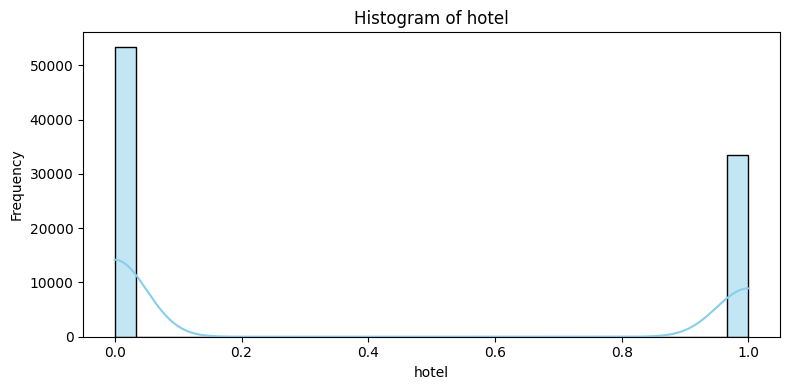

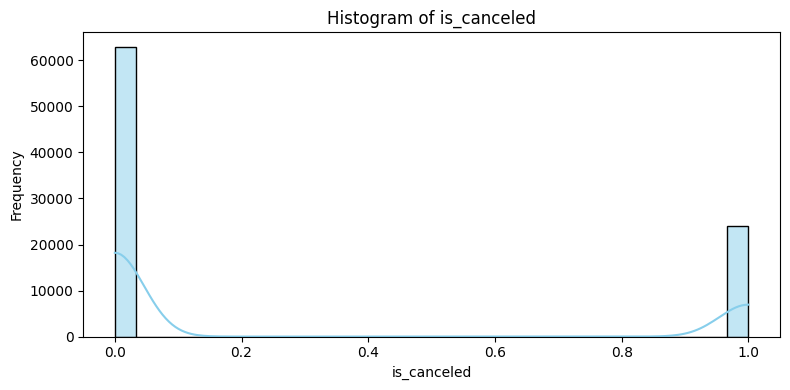

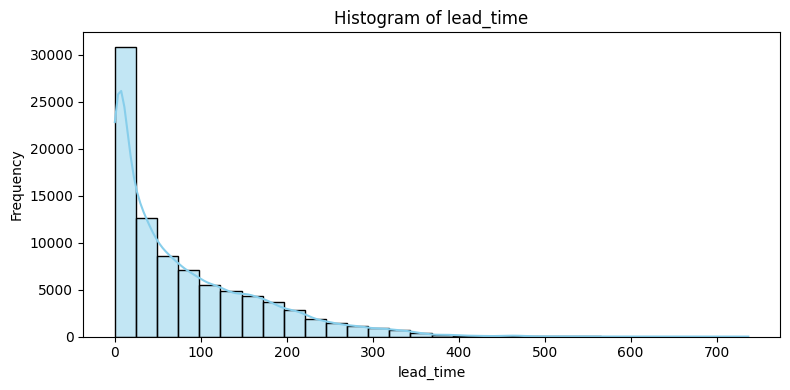

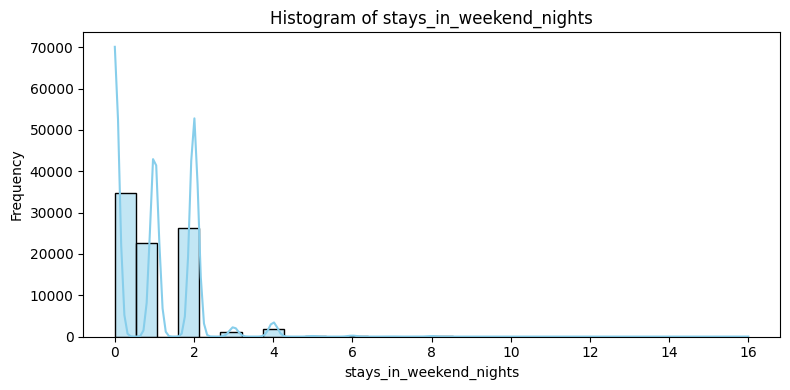

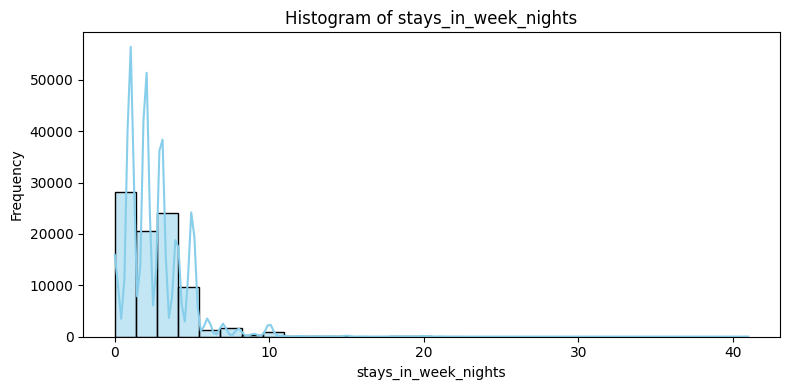

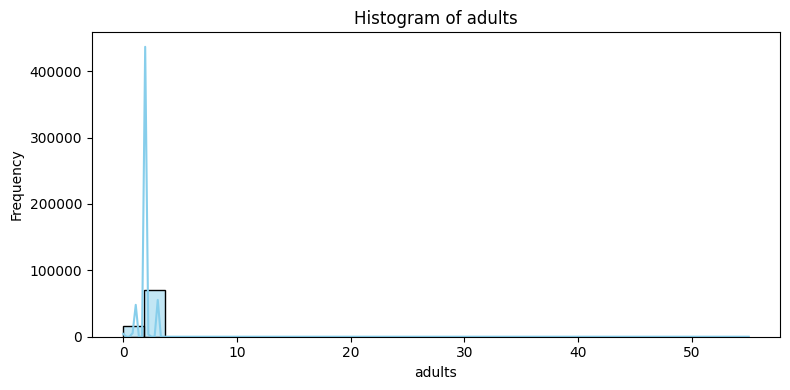

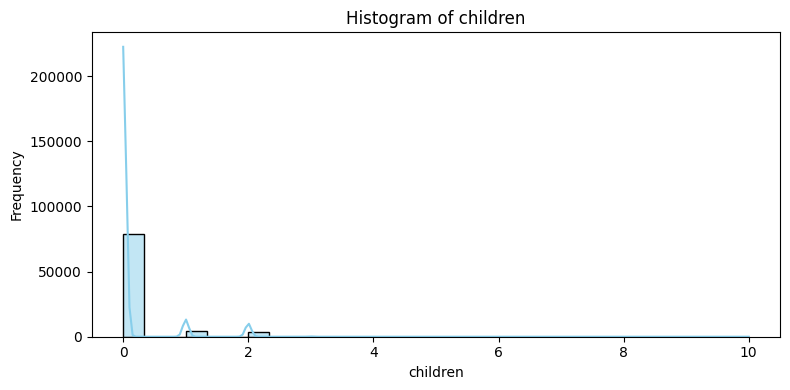

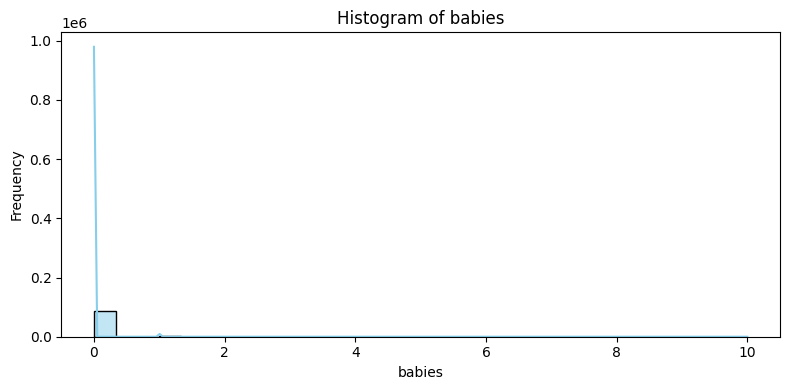

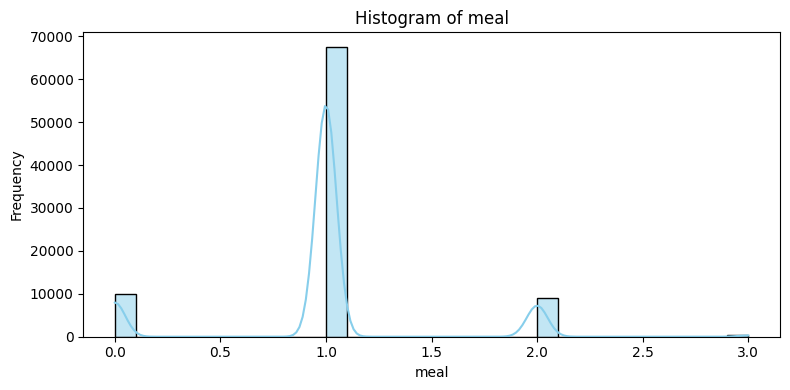

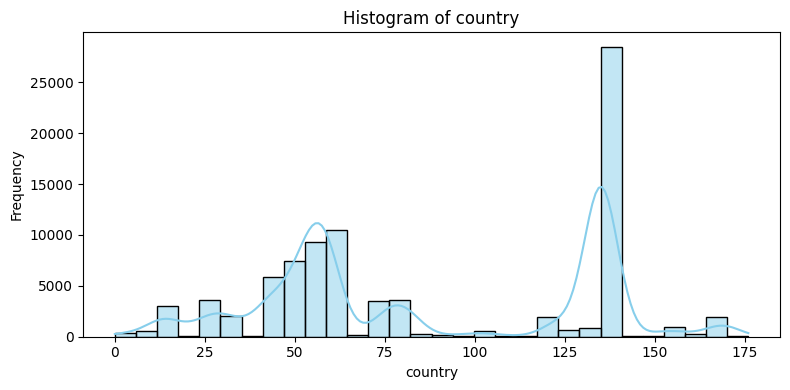

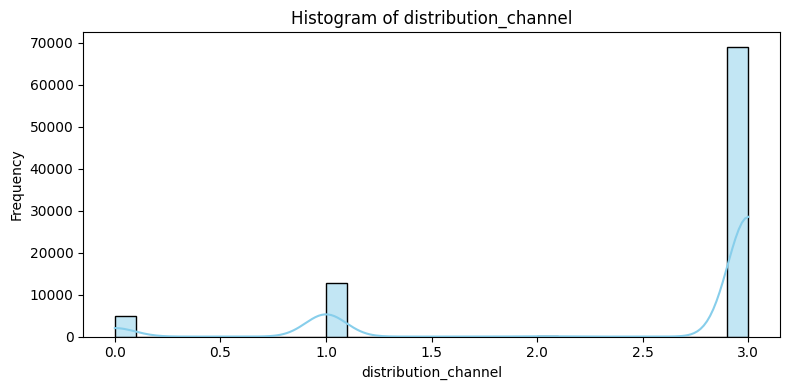

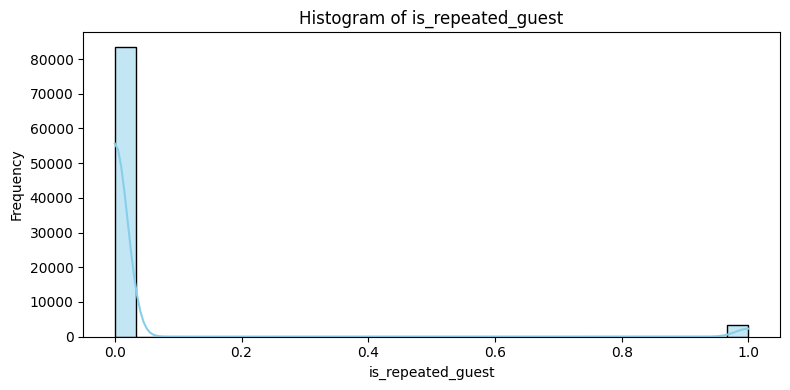

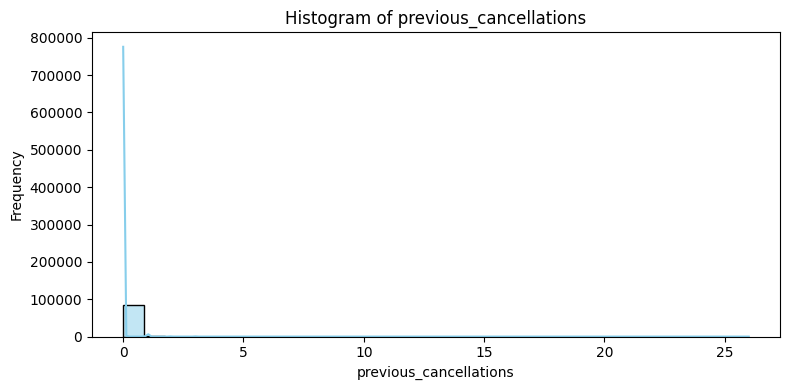

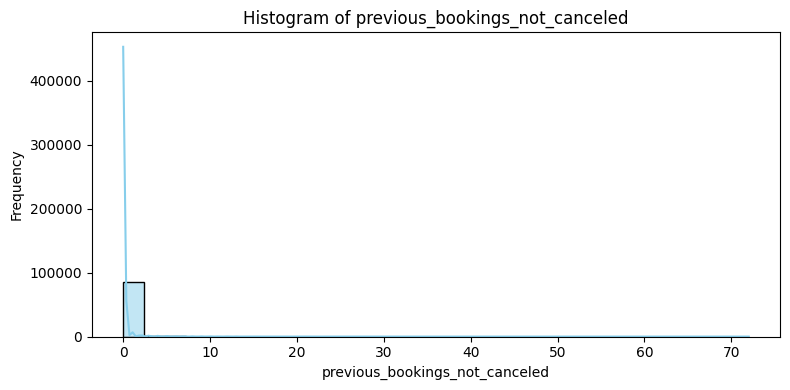

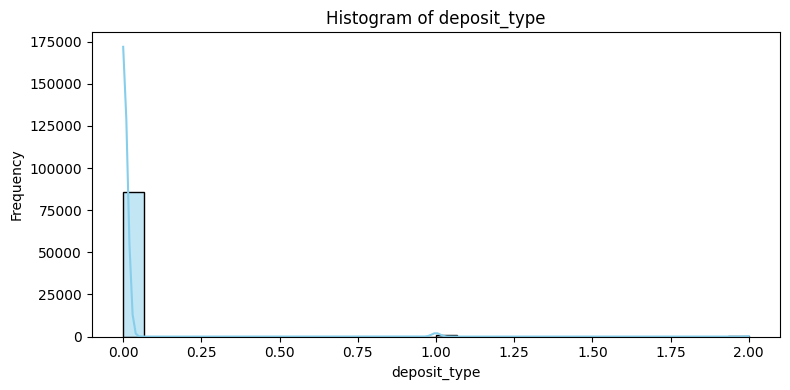

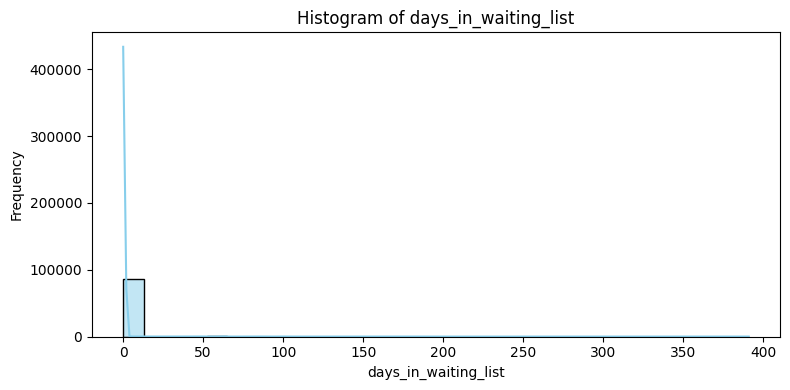

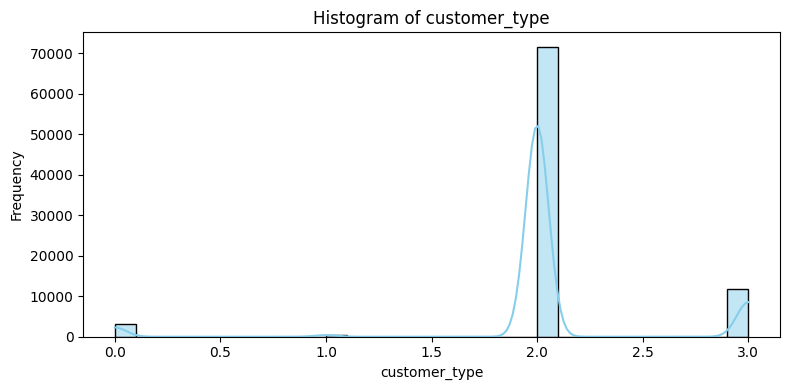

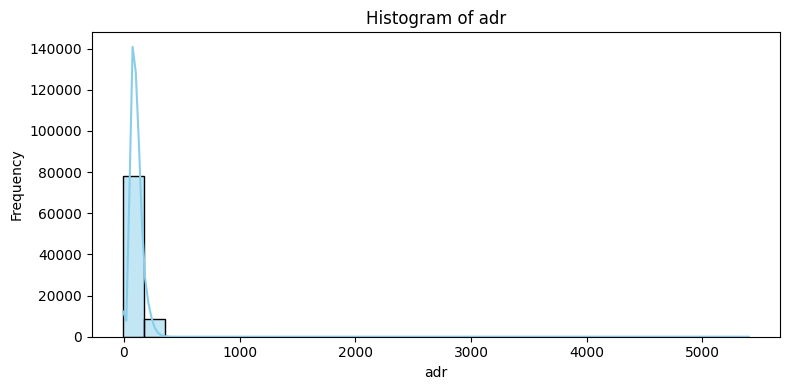

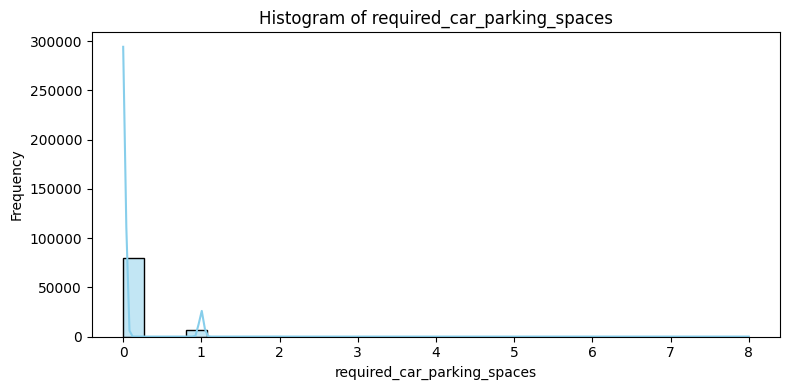

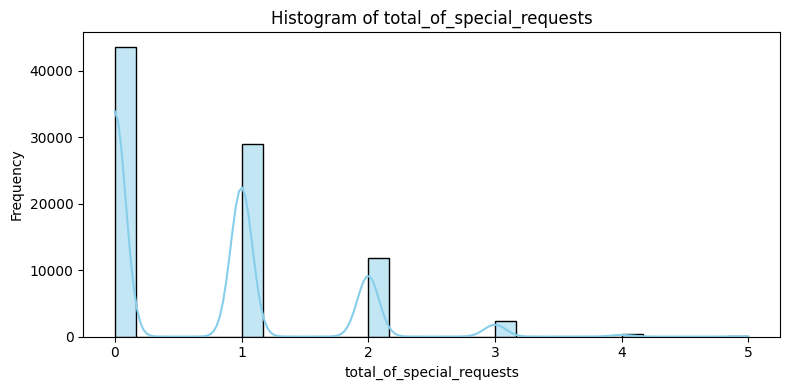

In [ ]:
def plot_histograms(df, bins=30):
    """
    Plots histograms with KDE for all numeric columns in the DataFrame.

    Args:
        df: Input DataFrame.
        bins: Number of bins to use in histograms.
    """
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=bins, kde=True, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        #plt.savefig(f'{col} histogram.png') # save plot
        plt.show()

plot_histograms(df)

Box Plots for All Numeric Columns

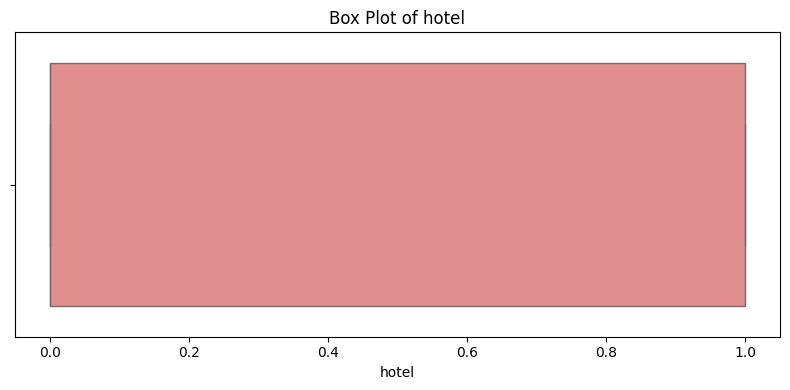

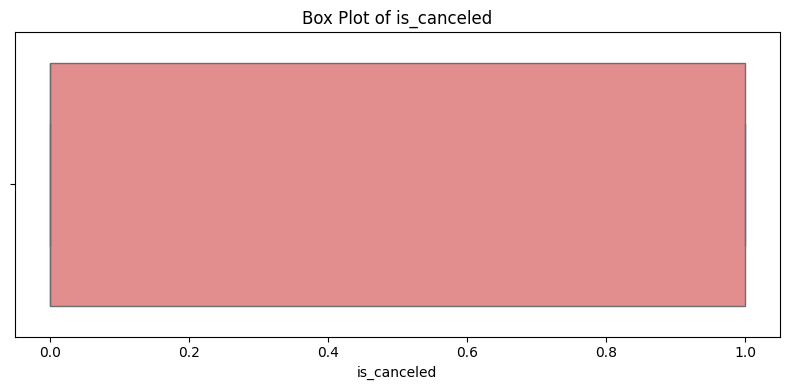

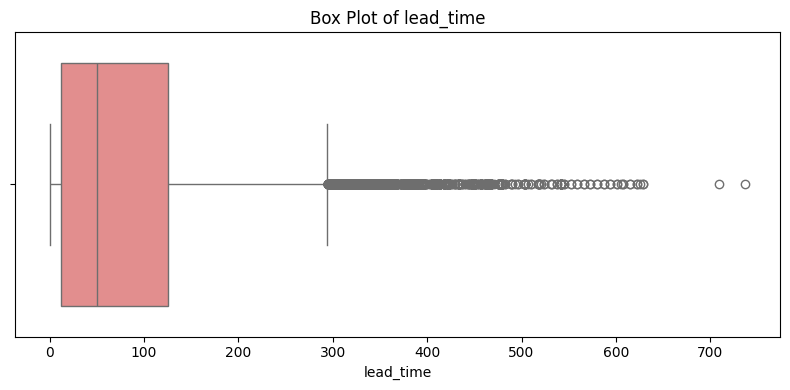

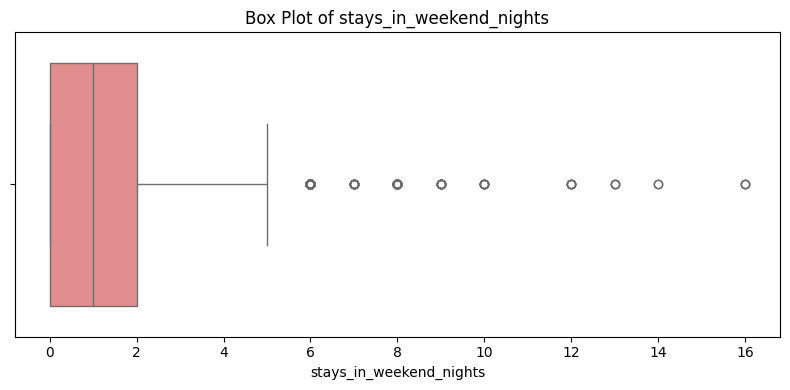

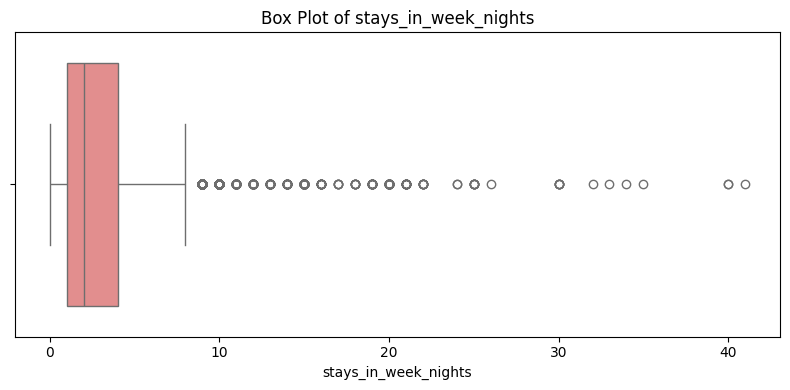

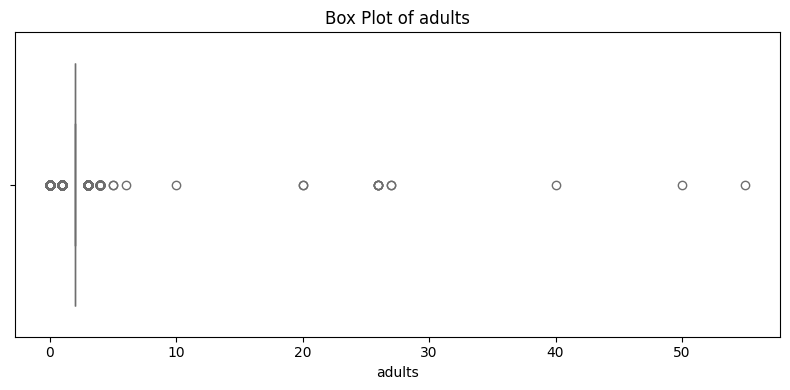

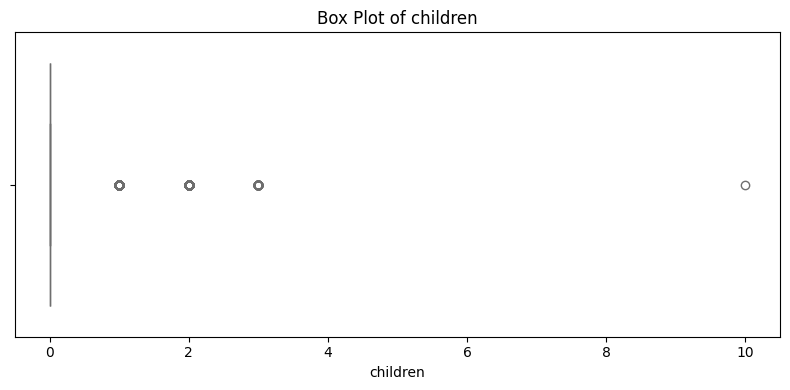

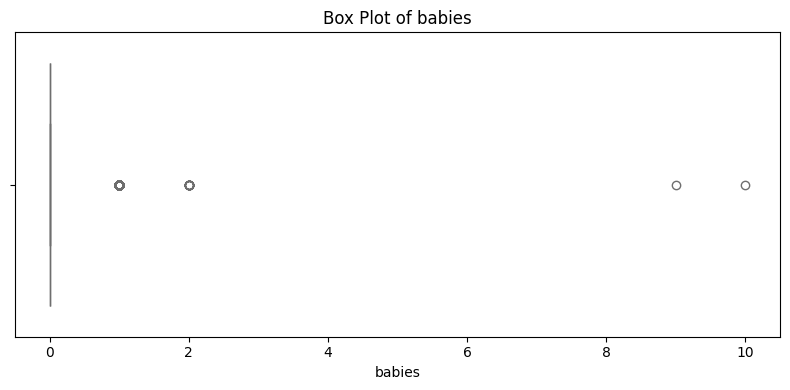

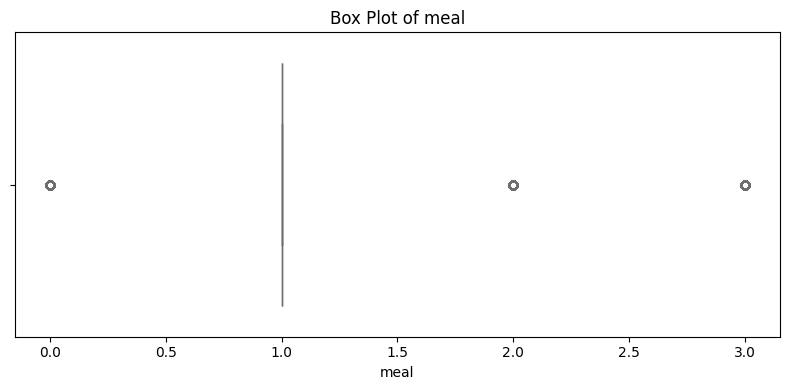

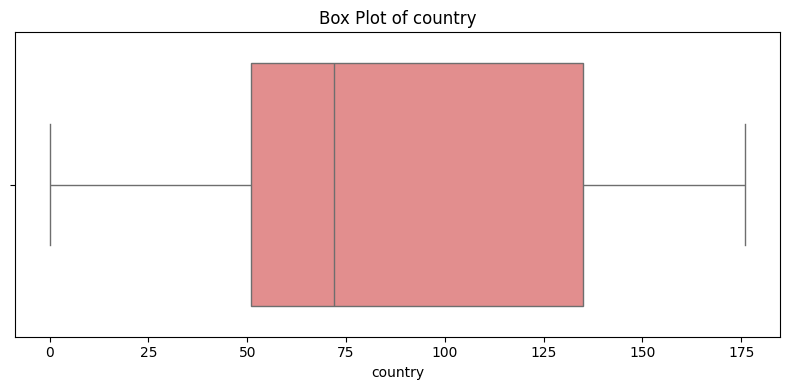

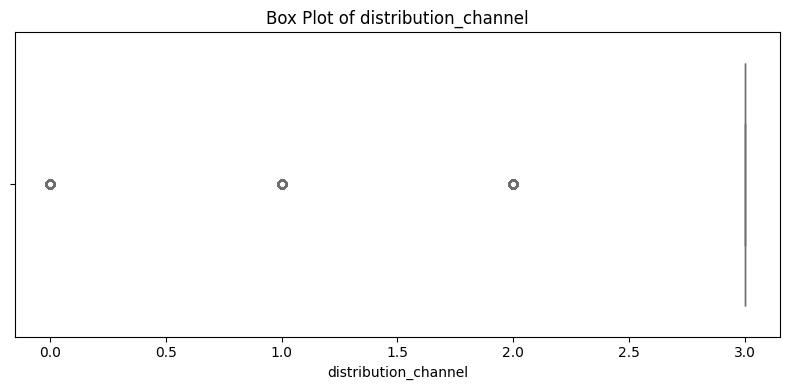

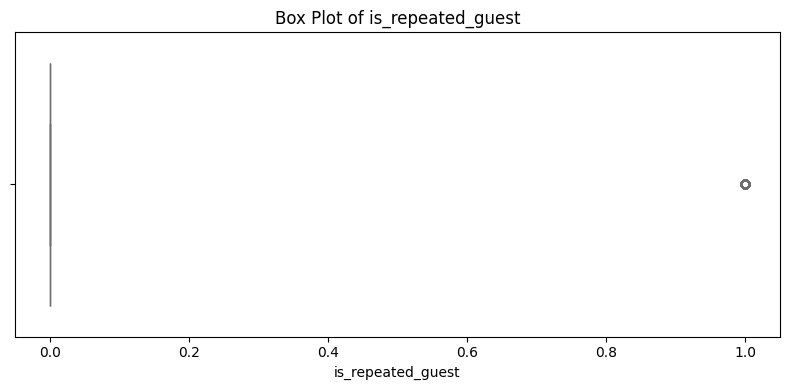

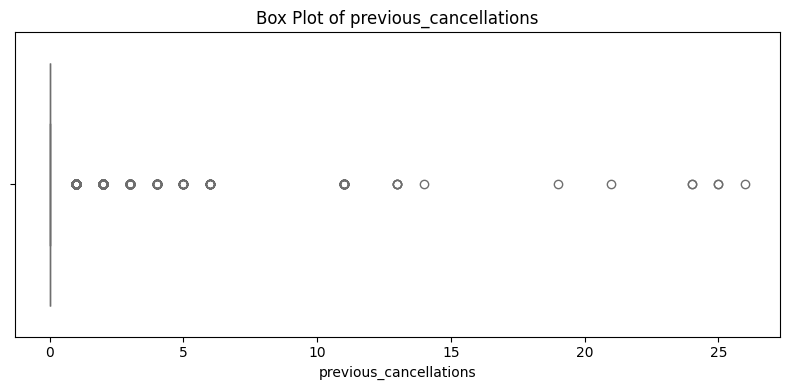

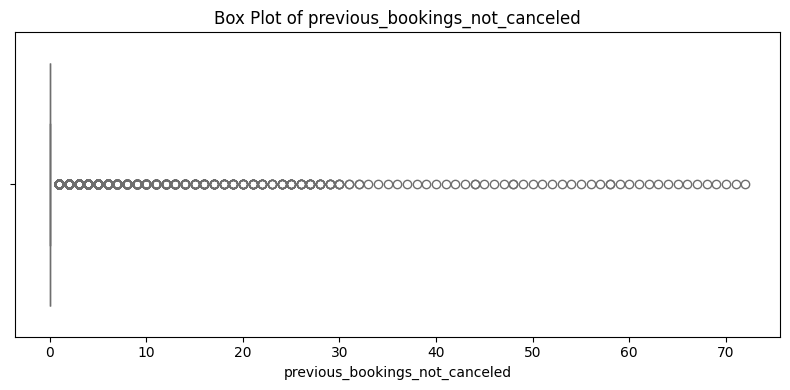

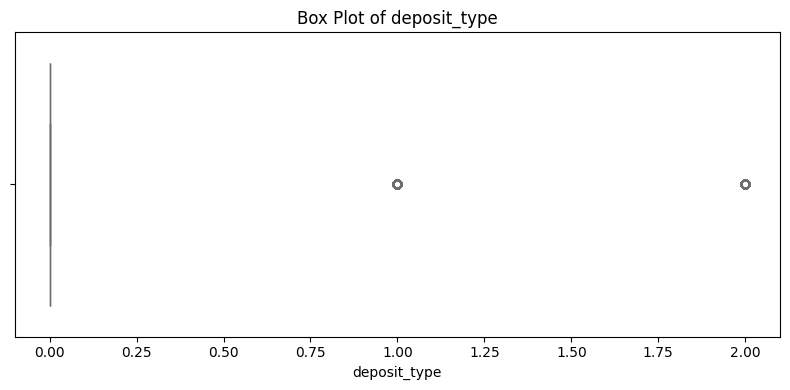

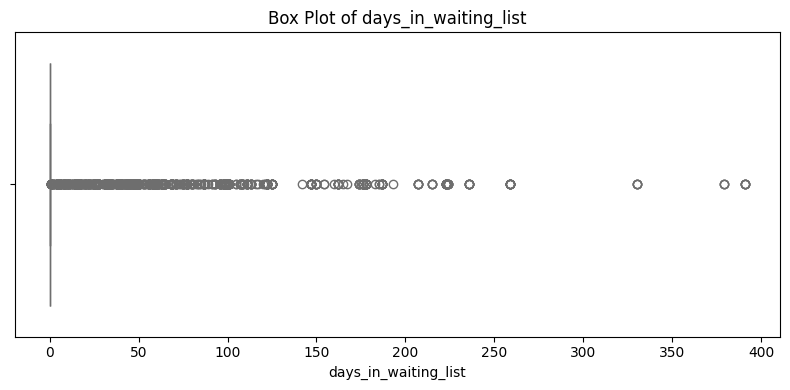

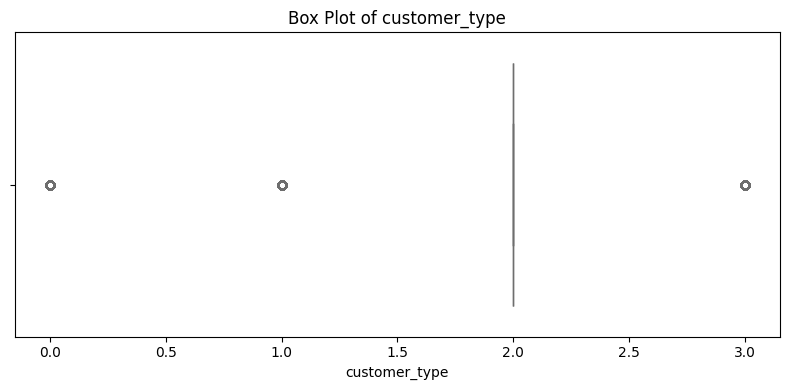

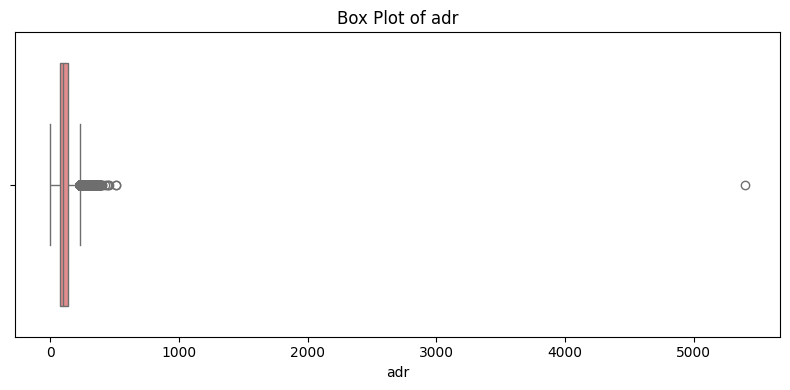

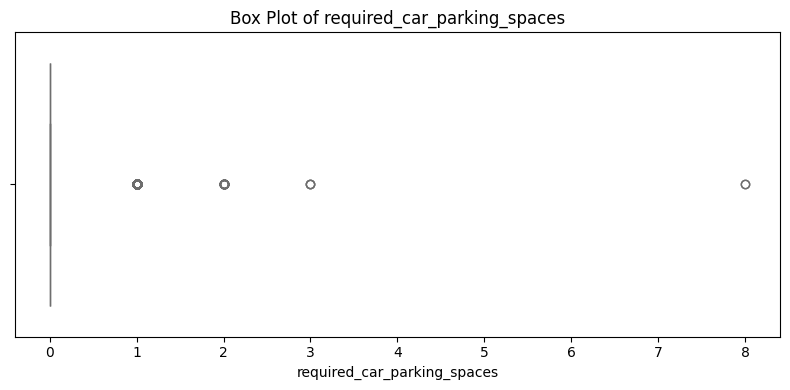

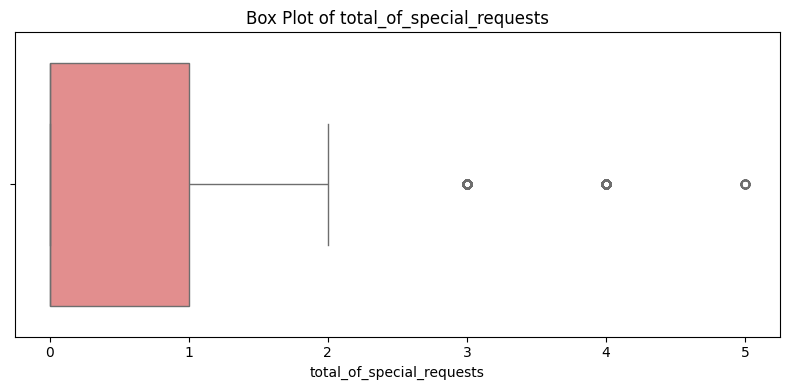

In [ ]:
def plot_boxplots(df):
    """
    Plots box plots for all numeric columns in the DataFrame.

    Args:
        df: Input DataFrame.
    """
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col], color='lightcoral')
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

plot_boxplots(df)

In [ ]:
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
14969,1,0,195,4,6,2,0,0,1,59,1,1,0,2,0,0,3,-6.38,0,0


In [ ]:
df.drop(df[df['adr'] < 0].index, inplace=True)
df.drop(df[df['children']==10].index, inplace=True)
df.drop(df[df['babies']>=9].index, inplace=True)

In [ ]:
df.shape

(86935, 20)

In [ ]:
#save cleaned data
df.to_csv('cleaned_data.csv', index=False)

**Check is Balanced Data**

In [ ]:
df['is_canceled'].value_counts()

,count
is_canceled,
0,62949
1,23986


In [46]:
cleaned_data = pd.read_csv('cleaned_data.csv')

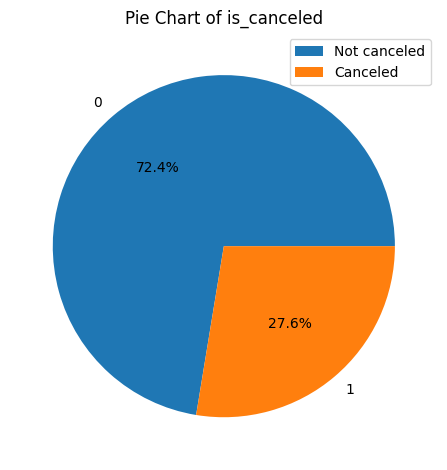

In [54]:
# Creating a pie chart and setting the labels for each uniqe is_canceled
plt.pie(cleaned_data['is_canceled'].value_counts(), labels=cleaned_data['is_canceled'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of is_canceled')
plt.legend()
plt.legend(labels=['Not canceled', 'Canceled'])
plt.tight_layout()
plt.show()


In [ ]:
canceld = df[df['is_canceled'] == 1]
not_canceld = df[df['is_canceled'] == 0]
not_canceld = not_canceld.sample(n=30000, random_state=42, replace = True)
df_balanced = pd.concat([canceld, not_canceld])

In [ ]:
df_balanced['is_canceled'].value_counts()

,count
is_canceled,
0,30000
1,23986


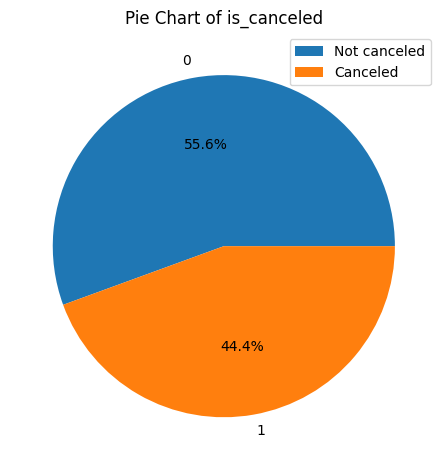

In [55]:
# Creating a pie chart and setting the labels for each uniqe is_canceled
plt.pie(df_balanced['is_canceled'].value_counts(), labels=df_balanced['is_canceled'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of is_canceled')
plt.legend()
plt.legend(labels=['Not canceled', 'Canceled'])
plt.tight_layout()
plt.show()



In [ ]:
df_balanced.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0
meal,0
country,0


In [ ]:
df_balanced.to_csv('df_balanced.csv', index=False)

#🔹 Model Building and Evaluation


Split Data

In [2]:
df_balanced = pd.read_csv('df_balanced.csv')

In [3]:
X = df_balanced.drop('is_canceled',axis=1)
y = df_balanced['is_canceled']

In [4]:
X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42 , stratify= y)

Creat a function of Model Performance

In [5]:
def evaluate_model(y_pred, model_name):
    """
    Evaluates the performance of a trained machine learning model.

    Args:
        y_pred: The predicted labels of the test set.
        model_name: The name of the model used to save the report.
    """
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    print("\n Classification Report:")
    # report as Table
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report.to_csv( model_name+' Report' +'.csv')
    return df_report

def plot_confusion_matrix(y_pred, model_name):
    """
    Plots the confusion matrix of a trained machine learning model.

    Args:
        y_pred: The predicted labels of the test set.
        model_name: The name of the model to use in the plot title and file name.
    """
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title("Confusion Matrix of "+ model_name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig(f'{model_name} confusion matrix.png') # save plot
    plt.show()


def plot_roc_curve(model, model_name):
    """
    Plots the ROC curve of a trained machine learning model.

    Args:
        model: The trained machine learning model.
        model_name: The name of the model to use in the plot title and file name.
    """

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of '+ model_name)
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name} roc_curve.png') # save plot
    plt.show()


# **1- Decision Tree**


In [42]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
evaluate_model(dt.predict(X_test), "Decision Tree")

Accuracy: 0.7589528278587305

 Classification Report:


,precision,recall,f1-score,support
0,0.774037,0.799667,0.786643,9000.000000
1,0.738620,0.708032,0.723003,7196.000000
accuracy,0.758953,0.758953,0.758953,0.758953
macro avg,0.756329,0.753849,0.754823,16196.000000
weighted avg,0.758301,0.758953,0.758367,16196.000000


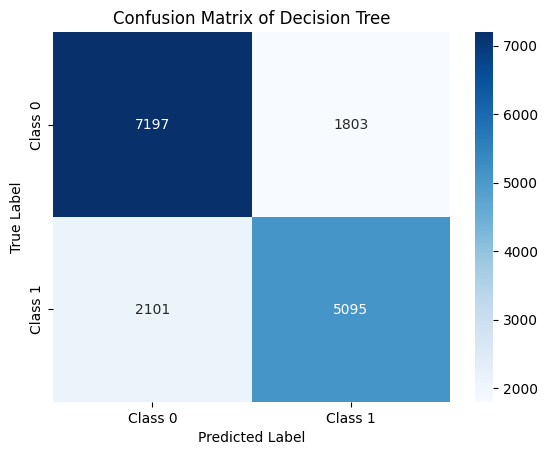

In [44]:
plot_confusion_matrix(dt.predict(X_test), "Decision Tree")

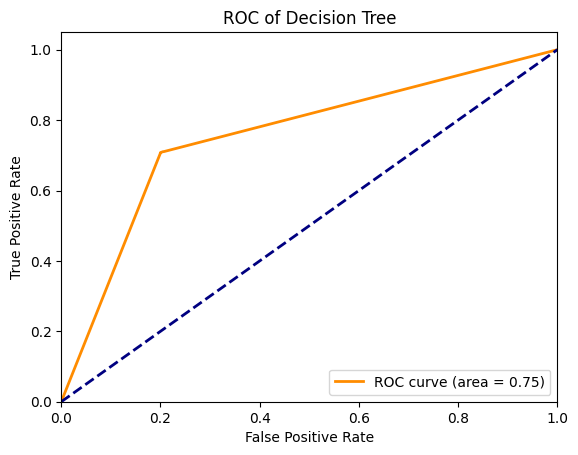

In [45]:
plot_roc_curve(dt, "Decision Tree")

* with Hyperparameter Tuning using GridSearchCV

In [21]:
dt_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
print("Best Decision Tree:", grid_dt.best_params_)

joblib.dump(best_dt, 'best_decision_tree_model.pkl')
print("Model saved successfully!")

Best Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5}
Model saved successfully!


In [ ]:
DT_pred = best_dt.predict(X_test)
evaluate_model(DT_pred, "Decision Tree")

Accuracy: 0.7559273894788837

 Classification Report:


,precision,recall,f1-score,support
0,0.776973,0.786556,0.781735,9000.000000
1,0.728864,0.717621,0.723199,7196.000000
accuracy,0.755927,0.755927,0.755927,0.755927
macro avg,0.752918,0.752088,0.752467,16196.000000
weighted avg,0.755598,0.755927,0.755727,16196.000000


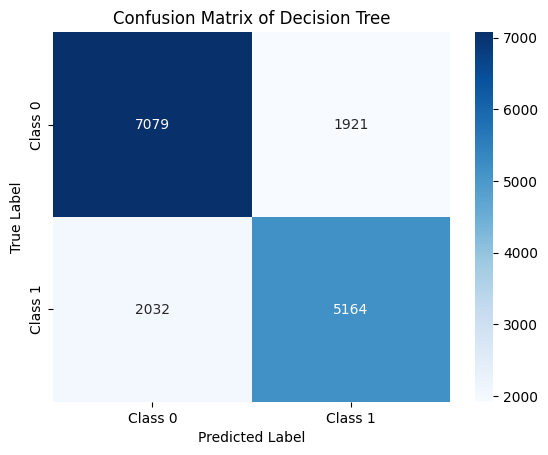

In [ ]:
plot_confusion_matrix(DT_pred,'Decision Tree')

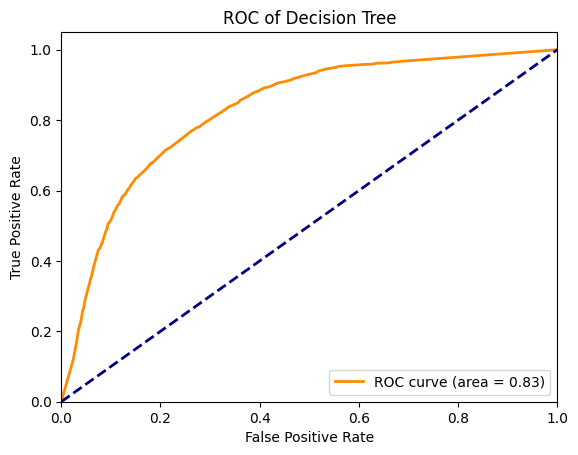

In [ ]:
plot_roc_curve(best_dt, 'Decision Tree')



---



# **2- SVM**

In [ ]:
# Create a RBF SVM classifier with gamma=0.1
SVM_RBF = SVC(kernel='rbf', gamma=0.1)
SVM_RBF.fit(X_train, y_train)

#save SVM model
joblib.dump(SVM_RBF, 'SVM_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
SVM_pred = SVM_RBF.predict(X_test)
evaluate_model(SVM_pred, 'SVM')

Accuracy: 0.7044331933810818

 Classification Report:


,precision,recall,f1-score,support
0,0.737566,0.726667,0.732076,9000.000000
1,0.664347,0.676626,0.670430,7196.000000
accuracy,0.704433,0.704433,0.704433,0.704433
macro avg,0.700957,0.701646,0.701253,16196.000000
weighted avg,0.705034,0.704433,0.704686,16196.000000


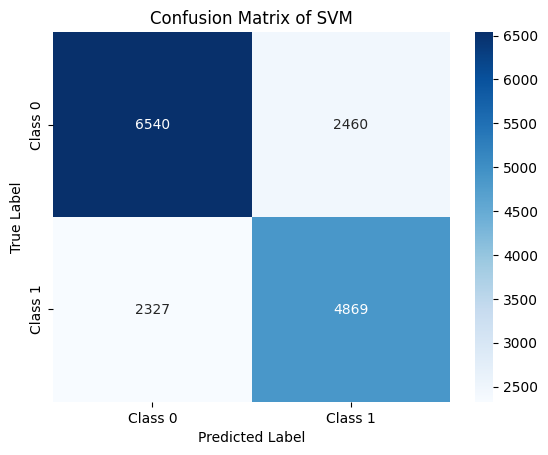

In [ ]:
plot_confusion_matrix(SVM_pred, 'SVM')

# **3- Random Forest**

Defult Parameters

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
joblib.dump(rf, 'random_forest_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
rf_pred = rf.predict(X_test)
evaluate_model(rf_pred, 'Random Forest')

Accuracy: 0.8106322548777476

 Classification Report:


,precision,recall,f1-score,support
0,0.817239,0.849111,0.832870,9000.000000
1,0.801607,0.762507,0.781568,7196.000000
accuracy,0.810632,0.810632,0.810632,0.810632
macro avg,0.809423,0.805809,0.807219,16196.000000
weighted avg,0.810293,0.810632,0.810076,16196.000000


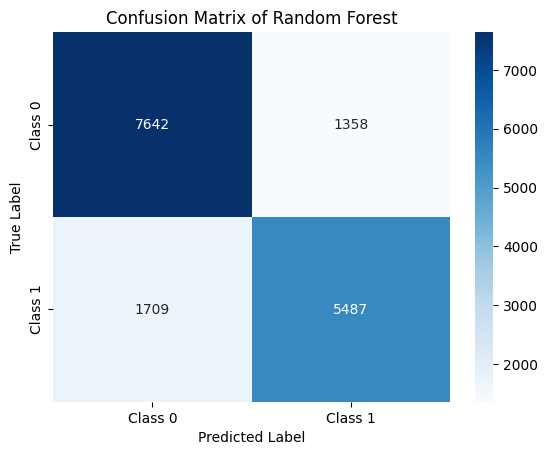

In [ ]:
plot_confusion_matrix(rf_pred, 'Random Forest')

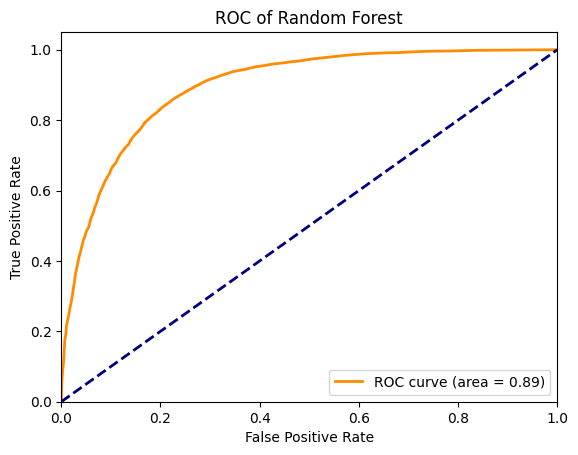

In [ ]:
plot_roc_curve(rf, 'Random Forest')

* Hyperparameter Tuning using GridSearchCV

In [ ]:
rf_params = {
    'n_estimators': [100, 200,250,300,400],
    'max_depth': [10, 20,30,40],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1, 2,3],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest:", grid_rf.best_params_)

#Save a trained model
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print("Model saved successfully!")


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Model saved successfully!


In [ ]:
best_rf_pred = best_rf.predict(X_test)
evaluate_model(best_rf_pred, 'Random Forest')

Accuracy: 0.8134724623363794

 Classification Report:


,precision,recall,f1-score,support
0,0.820796,0.849889,0.835089,9000.000000
1,0.803548,0.767927,0.785334,7196.000000
accuracy,0.813472,0.813472,0.813472,0.813472
macro avg,0.812172,0.808908,0.810211,16196.000000
weighted avg,0.813133,0.813472,0.812982,16196.000000


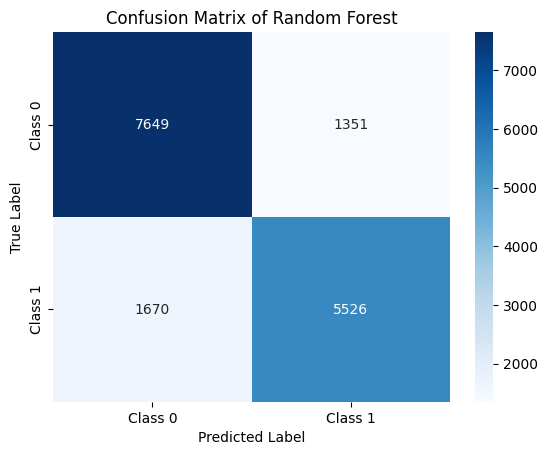

In [ ]:
plot_confusion_matrix(best_rf_pred, 'Random Forest')

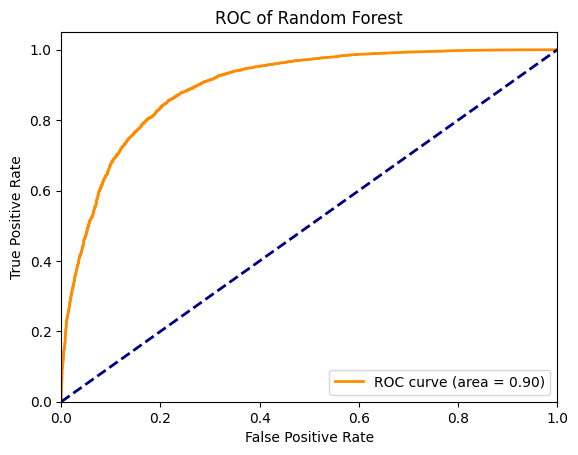

In [ ]:
plot_roc_curve(best_rf, 'Random Forest')



---



# **4- XGBoost**

* Defult Parameters

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
evaluate_model(xgb_pred, 'XGBoost')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7835885403803409

 Classification Report:


,precision,recall,f1-score,support
0,0.799782,0.814444,0.807047,9000.000000
1,0.762480,0.744997,0.753637,7196.000000
accuracy,0.783589,0.783589,0.783589,0.783589
macro avg,0.781131,0.779721,0.780342,16196.000000
weighted avg,0.783209,0.783589,0.783316,16196.000000


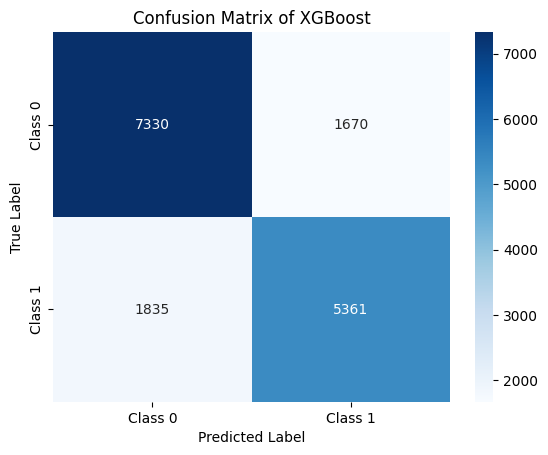

In [ ]:
plot_confusion_matrix(xgb_pred, 'XGBoost')

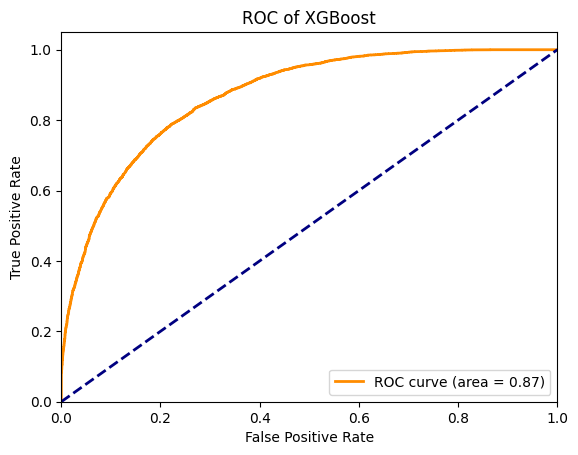

In [ ]:
plot_roc_curve(xgb, 'XGBoost')

* Hyperparameter Tuning using GridSearchCV

In [ ]:
xgb_params = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [7, 10, 20, 30,40],
    'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
print("Best XGBoost:", grid_xgb.best_params_)

# save the model
joblib.dump(best_xgb, 'best_xgboost_model.pkl')
print("Model saved successfully!")

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:47:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'subsample': 1.0}
Model saved successfully!


In [ ]:
best_xgb_pred = best_xgb.predict(X_test)
evaluate_model(best_xgb_pred, 'XGBoost')

Accuracy: 0.8079155346999259

 Classification Report:


,precision,recall,f1-score,support
0,0.820996,0.836778,0.828812,9000.000000
1,0.790830,0.771818,0.781208,7196.000000
accuracy,0.807916,0.807916,0.807916,0.807916
macro avg,0.805913,0.804298,0.805010,16196.000000
weighted avg,0.807593,0.807916,0.807661,16196.000000


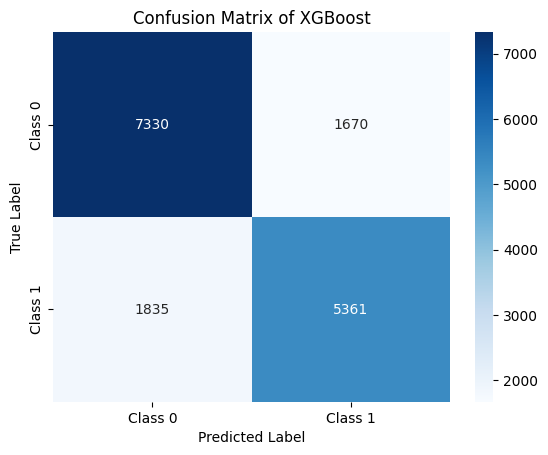

In [ ]:
plot_confusion_matrix(xgb_pred, 'XGBoost')

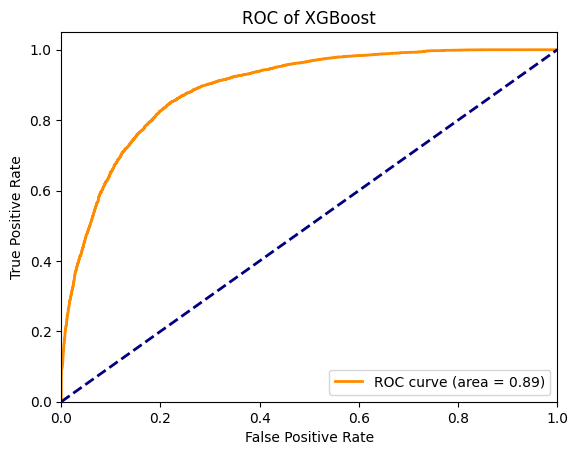

In [ ]:
plot_roc_curve(best_xgb, 'XGBoost')



---



# **5- KNN**
* with Hyperparameter Tuning using GridSearchCV

In [ ]:
knn_params = {
    'n_neighbors': list(range(3, 20)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN:", grid_knn.best_params_)

# save the model
joblib.dump(best_knn, 'best_knn_model.pkl')
print("Model saved successfully!")

Best KNN: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Model saved successfully!


In [ ]:
knn_pred = best_knn.predict(X_test)
evaluate_model(knn_pred, 'KNN')

Accuracy: 0.7371573227957521

 Classification Report:


,precision,recall,f1-score,support
0,0.755632,0.778889,0.767084,9000.000000
1,0.712386,0.684964,0.698406,7196.000000
accuracy,0.737157,0.737157,0.737157,0.737157
macro avg,0.734009,0.731926,0.732745,16196.000000
weighted avg,0.736418,0.737157,0.736570,16196.000000


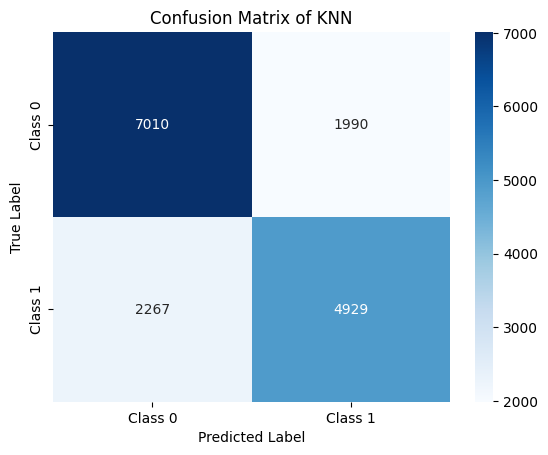

In [ ]:
plot_confusion_matrix(knn_pred,'KNN')

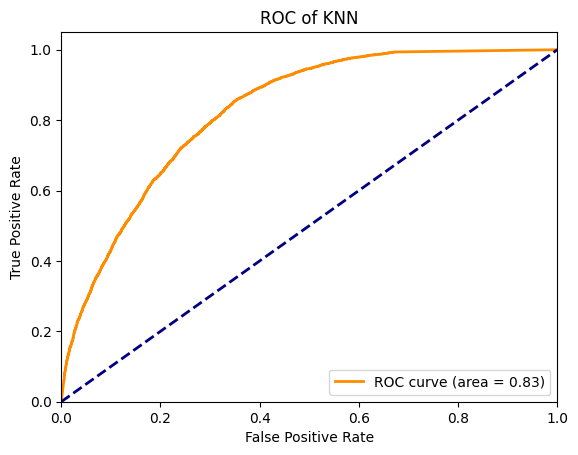

In [ ]:
plot_roc_curve(best_knn, 'KNN')

# **6- lightgbm**

In [ ]:
# build the lightgbm model
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 16790, number of negative: 21000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 37790, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444297 -> initscore=-0.223739
[LightGBM] [Info] Start training from score -0.223739


LGBMClassifier()

In [ ]:
lightgbm_pred = lgbm.predict(X_test)
evaluate_model(lightgbm_pred, "Lightgbm")

Accuracy: 0.7772906890590269

 Classification Report:


,precision,recall,f1-score,support
0,0.790165,0.815889,0.802821,9000.000000
1,0.759959,0.729016,0.744166,7196.000000
accuracy,0.777291,0.777291,0.777291,0.777291
macro avg,0.775062,0.772453,0.773494,16196.000000
weighted avg,0.776744,0.777291,0.776760,16196.000000


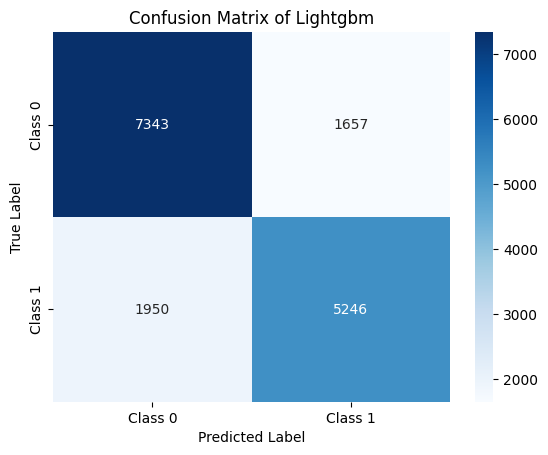

In [ ]:
plot_confusion_matrix(lightgbm_pred, "Lightgbm")

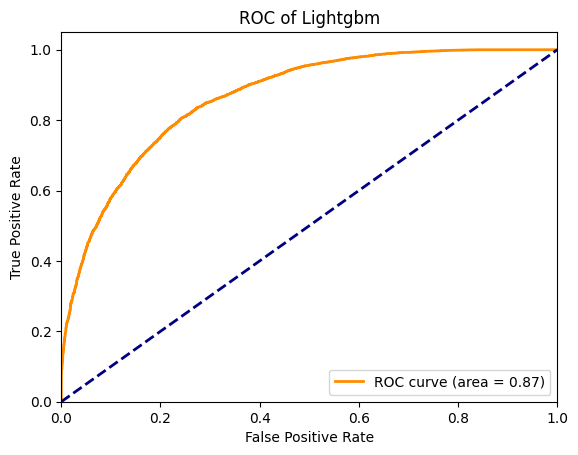

In [ ]:
plot_roc_curve(lgbm, "Lightgbm")

In [ ]:

# Define the model
model = lgb.LGBMClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1, 0.3],
    'num_leaves': [50, 70],
    'max_depth': [10, 15, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[LightGBM] [Info] Number of positive: 16790, number of negative: 21000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 37790, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444297 -> initscore=-0.223739
[LightGBM] [Info] Start training from score -0.223739
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300, 'num_leaves': 70, 'subsample': 0.8}


In [ ]:
joblib.dump(best_model, 'best_lightgbm_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Evaluate
l_y_pred = best_model.predict(X_test)
l_y_proba = best_model.predict_proba(X_test)[:, 1]  # For ROC

In [ ]:
evaluate_model(l_y_pred, "Lightgbm")

Accuracy: 0.7992714250432206

 Classification Report:


,precision,recall,f1-score,support
0,0.815498,0.825556,0.820496,9000.000000
1,0.778405,0.766398,0.772355,7196.000000
accuracy,0.799271,0.799271,0.799271,0.799271
macro avg,0.796951,0.795977,0.796425,16196.000000
weighted avg,0.799017,0.799271,0.799106,16196.000000


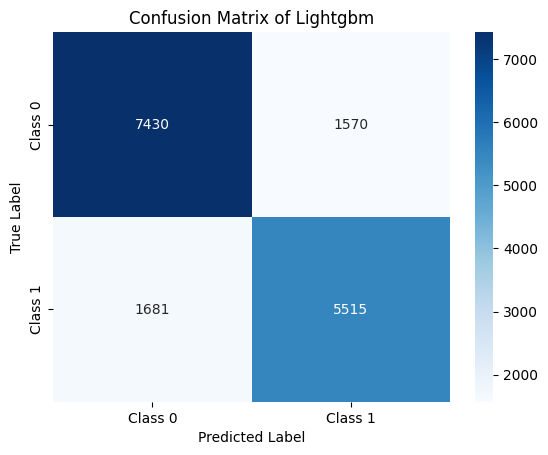

In [ ]:
plot_confusion_matrix(l_y_pred, "Lightgbm")

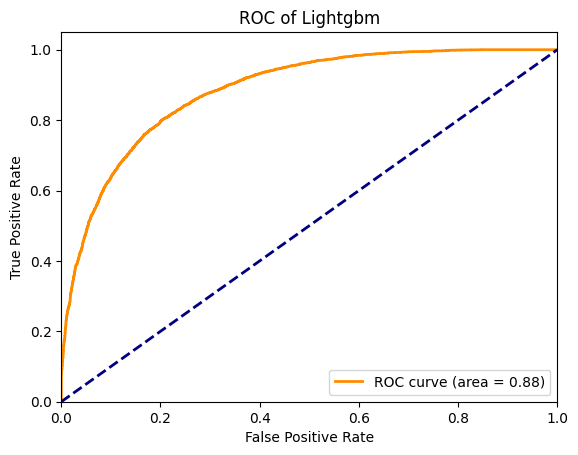

In [ ]:
plot_roc_curve(best_model, "Lightgbm")



---



# **7- ANN**

In [ ]:
# Define the ANN model
ann = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = ann.fit(
    X_train, y_train,
    epochs=30,           # Max epochs
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model
loss, accuracy = ann.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
945/945 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6006 - loss: 1.0725 - val_accuracy: 0.6383 - val_loss: 0.6405
Epoch 2/30
945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6773 - loss: 0.6073 - val_accuracy: 0.7047 - val_loss: 0.5707
Epoch 3/30
945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6962 - loss: 0.5806 - val_accuracy: 0.6410 - val_loss: 0.6446
Epoch 4/30
945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6966 - loss: 0.5782 - val_accuracy: 0.6990 - val_loss: 0.5739
Epoch 5/30
945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7105 - loss: 0.5589 - val_accuracy: 0.7113 - val_loss: 0.5484
Epoch 6/30
945/945 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7148 - loss: 0.5537 - val_accuracy: 0.7282 - val_loss: 0.5412
Epoch 7/30
945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7080 - loss: 0.5582 - val_accuracy: 0.7265 - val_loss: 0.5366
Epoch 8/30
945/945 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7204 - loss: 0.5447 - val_accuracy: 0.

In [ ]:
ann.save('ann_model.keras')

In [ ]:
ann.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

In [ ]:
# Make predictions
y_pred_prob = ann.predict(X_test) # Get prediction probabilities
ann_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels

507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test, ann_pred)
print(f"Accuracy: {accuracy}")

# report as Table
report = classification_report(y_test, ann_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv( 'ANN Report.csv')
df_report

Accuracy: 0.7432081995554458


,precision,recall,f1-score,support
0,0.747774,0.811667,0.778411,9000.000000
1,0.736269,0.657588,0.694707,7196.000000
accuracy,0.743208,0.743208,0.743208,0.743208
macro avg,0.742021,0.734627,0.736559,16196.000000
weighted avg,0.742662,0.743208,0.741221,16196.000000


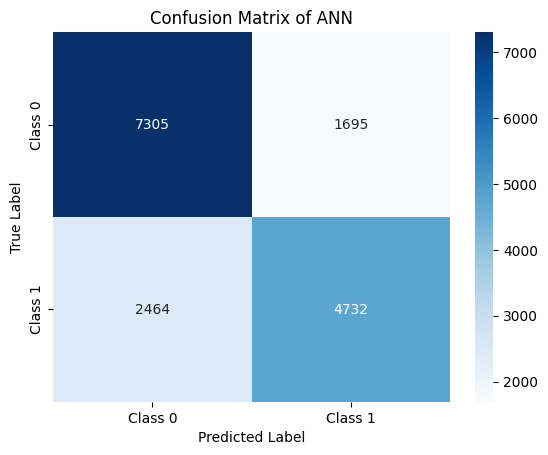

In [ ]:
conf_matrix = confusion_matrix(y_test, ann_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix of ANN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('ANN_confusion_matrix.png') # Save the plot
plt.show()

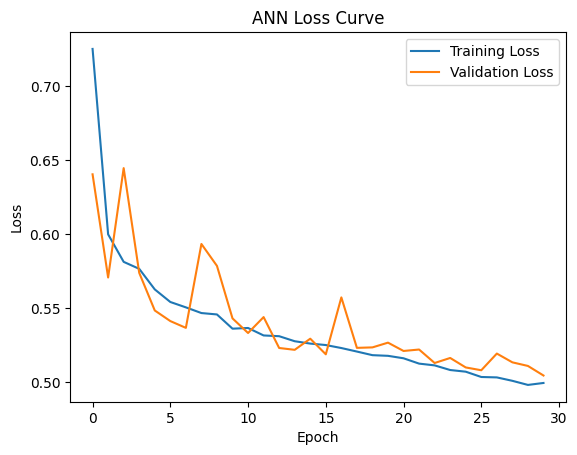

In [ ]:
# Plot the loss curve of ANN Model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN Loss Curve')
plt.legend()
plt.savefig('ANN_loss_curve.png') # Save the plot
plt.show()


# 🔹 Comparison of All Models

Define a DataFrame to save Accuracy of each Model

In [ ]:
all_acc = []
models_pred = [DT_pred, best_rf_pred, best_xgb_pred, knn_pred, l_y_pred,  ann_pred]
model_names = ['Decision Tree', 'SVM', 'Random Forest', 'XGBoost', 'KNN', 'ANN','lightgbm']
for i in range(len(model_names)):
    m_pred = models_pred[i]
    accuracy = accuracy_score(y_test, m_pred)

    all_acc.append([model_names[i], accuracy])

In [69]:
models_accuracy = pd.DataFrame(all_acc, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
models_accuracy['Accuracy'] = models_accuracy['Accuracy']
models_accuracy['Accuracy'] = models_accuracy['Accuracy'].round(2)
models_accuracy

,Model,Accuracy
2,Random Forest,81.35
3,XGBoost,80.79
5,lightgbm,79.93
0,Decision Tree,75.59
6,ANN,74.32
4,KNN,73.72
1,SVM,70.44


Accuracy comparison using Bar Plot

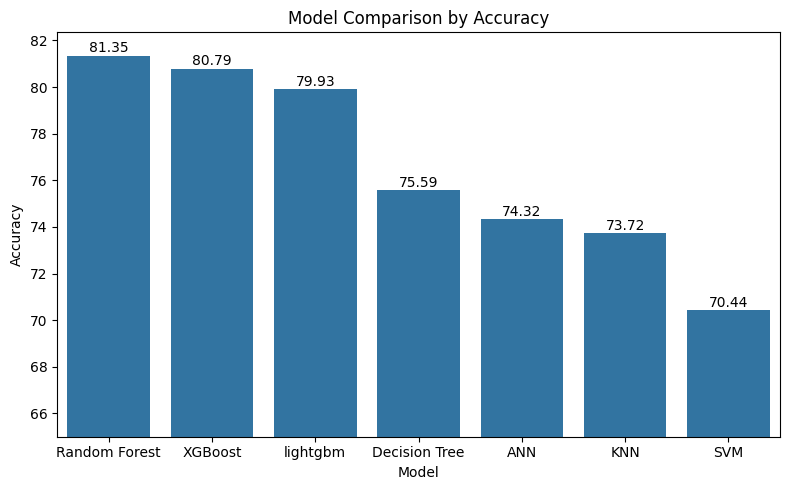

In [70]:
plt.figure(figsize=(8, 5))
sns.barplot(data=models_accuracy, x='Model', y='Accuracy')
plt.title('Model Comparison by Accuracy')
plt.tight_layout()
#show value in each bar
for i, v in enumerate(models_accuracy['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
plt.ylim([65, models_accuracy['Accuracy'].max()+1 ])
plt.savefig('model_comparison_accuracy.png')
plt.show()

507/507 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


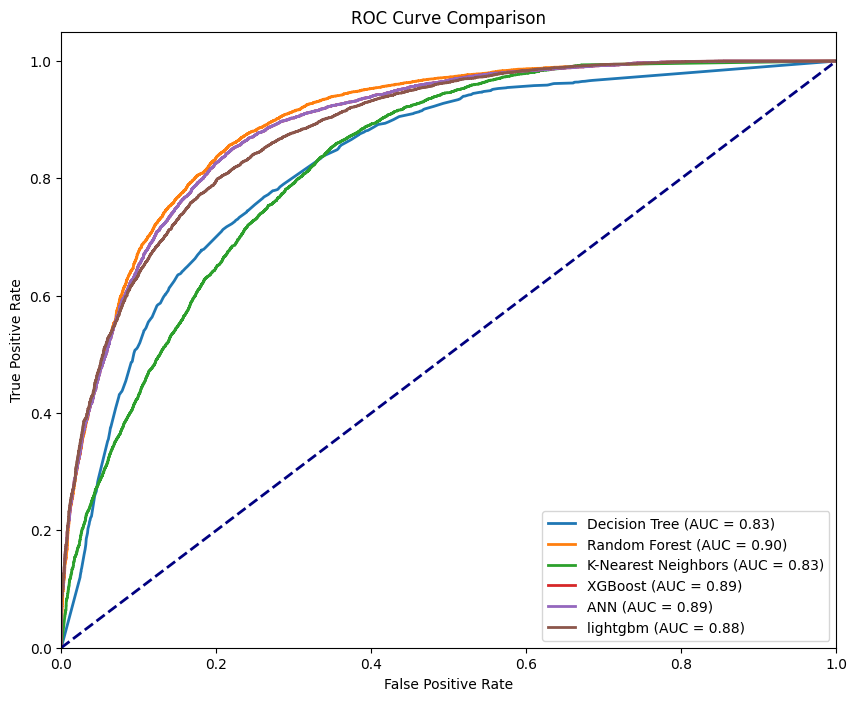

Decision Tree: AUC - ROC = 0.83
Random Forest: AUC - ROC = 0.90
K-Nearest Neighbors: AUC - ROC = 0.83
XGBoost: AUC - ROC = 0.89
ANN: AUC - ROC = 0.89
lightgbm: AUC - ROC = 0.88


In [ ]:
# Define the models
models = {
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "K-Nearest Neighbors": best_knn,
    "XGBoost": best_xgb,
    "ANN": ann,
    "lightgbm": best_model
}

# Initialize a dictionary to store AUC - ROC scores
roc_auc_scores = {}

# Plot the ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():

    # Predict the probabilities
    if name == "ANN":
        y_pred_prob = ann.predict(X_test)
    else:
        y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate the AUC - ROC score
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.savefig('ROC_curve_comparison.png')
plt.show()

# Print the AUC - ROC scores for each model
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC - ROC = {score:.2f}')

Optional: download all files at once for report

In [ ]:
import os
import shutil

def move_files_to_folder(folder_name):
    """Moves all files ending in .png, .csv, .pkl, and .keras in the current directory to a new folder.

    Args:
      folder_name: The name of the new folder.
    """

    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    for filename in os.listdir():
        if filename.endswith((".png", ".csv", ".pkl", ".keras")):
            source_path = os.path.join(os.getcwd(), filename)
            destination_path = os.path.join(os.getcwd(), folder_name, filename)
            shutil.move(source_path, destination_path)

#Create a folder
move_files_to_folder('project report data')

In [ ]:
import shutil
import os

def zip_folder(folder_name, output_filename):
  """Zips a folder.

  Args:
    folder_name: The name of the folder to zip.
    output_filename: The name of the output zip file.
  """
  shutil.make_archive(output_filename, 'zip', folder_name)

zip_folder('project report data', 'project_report_data0')